# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
#from api_keys import api_key
api_key = '7c721f45dbc8858414a6e85fdad457e0'
# Incorporated citipy to determine city based on latitude and longitude
#!pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [77]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [81]:
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key
weather=[]
row_number=1
set_number=1


for i, city in enumerate(cities):
    url_city = url+'&q='+city
    weather_city=requests.get(url_city).json() #ping api for information and get as a json file
    print(f'Retrieving data for city {i+1} of {len(cities)}') 
        #https://openweathermap.org/history

        #getting variables for each city Humiditiy, Temp, Cloudiness, Wind Speed, Lat, Long
    try:
        lat_city=weather_city['coord']['lon']
        lon_city=weather_city['coord']['lon']
        max_temp_city=weather_city['main']['temp_max']
        humidity_city=weather_city['main']['humidity']
        cloudiness_city=weather_city['clouds']['all']
        wind_speed_city=weather_city['wind']['speed']
        city2=weather_city['name']

        #appending data into weather list
        weather.append({
                        'Latitude': lat_city,
                        'Longitute': lon_city,
                        'Max Temp': max_temp_city,
                        'Humidity': humidity_city,
                        'Cloudiness': cloudiness_city,
                        'Wind Speed': wind_speed_city,
                        'City': city2
                        })
    except:
        print('City not found!')
        pass


Retrieving data for city 1 of 587
Retrieving data for city 2 of 587
Retrieving data for city 3 of 587
Retrieving data for city 4 of 587
Retrieving data for city 5 of 587
Retrieving data for city 6 of 587
Retrieving data for city 7 of 587
Retrieving data for city 8 of 587
City not found!
Retrieving data for city 9 of 587
Retrieving data for city 10 of 587
Retrieving data for city 11 of 587
Retrieving data for city 12 of 587
Retrieving data for city 13 of 587
Retrieving data for city 14 of 587
Retrieving data for city 15 of 587
Retrieving data for city 16 of 587
Retrieving data for city 17 of 587
Retrieving data for city 18 of 587
Retrieving data for city 19 of 587
Retrieving data for city 20 of 587
Retrieving data for city 21 of 587
Retrieving data for city 22 of 587
Retrieving data for city 23 of 587
City not found!
Retrieving data for city 24 of 587
Retrieving data for city 25 of 587
Retrieving data for city 26 of 587
Retrieving data for city 27 of 587
Retrieving data for city 28 of 5

Retrieving data for city 223 of 587
Retrieving data for city 224 of 587
Retrieving data for city 225 of 587
Retrieving data for city 226 of 587
Retrieving data for city 227 of 587
City not found!
Retrieving data for city 228 of 587
Retrieving data for city 229 of 587
Retrieving data for city 230 of 587
Retrieving data for city 231 of 587
Retrieving data for city 232 of 587
Retrieving data for city 233 of 587
Retrieving data for city 234 of 587
Retrieving data for city 235 of 587
Retrieving data for city 236 of 587
Retrieving data for city 237 of 587
City not found!
Retrieving data for city 238 of 587
Retrieving data for city 239 of 587
Retrieving data for city 240 of 587
Retrieving data for city 241 of 587
Retrieving data for city 242 of 587
Retrieving data for city 243 of 587
Retrieving data for city 244 of 587
Retrieving data for city 245 of 587
Retrieving data for city 246 of 587
Retrieving data for city 247 of 587
Retrieving data for city 248 of 587
Retrieving data for city 249 of 

Retrieving data for city 443 of 587
Retrieving data for city 444 of 587
Retrieving data for city 445 of 587
Retrieving data for city 446 of 587
Retrieving data for city 447 of 587
Retrieving data for city 448 of 587
Retrieving data for city 449 of 587
Retrieving data for city 450 of 587
Retrieving data for city 451 of 587
Retrieving data for city 452 of 587
Retrieving data for city 453 of 587
Retrieving data for city 454 of 587
Retrieving data for city 455 of 587
Retrieving data for city 456 of 587
Retrieving data for city 457 of 587
Retrieving data for city 458 of 587
Retrieving data for city 459 of 587
Retrieving data for city 460 of 587
Retrieving data for city 461 of 587
Retrieving data for city 462 of 587
Retrieving data for city 463 of 587
Retrieving data for city 464 of 587
City not found!
Retrieving data for city 465 of 587
Retrieving data for city 466 of 587
Retrieving data for city 467 of 587
Retrieving data for city 468 of 587
Retrieving data for city 469 of 587
Retrieving d

In [87]:
# city_data_df = pd.DataFrame({'Latitude': lat_city,
#                            'Longitute': lon_city,
#                            'Temperature': max_temp_city,
#                            'Humidity': humidity_city,
#                            'Cloudiness': cloudiness_city,
#                            'Wind Speed': wind_speed_city})
# city_data_df

city_data_df = pd.DataFrame(weather)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [88]:
city_data_df.head()

,City,Cloudiness,Humidity,Latitude,Longitute,Max Temp,Wind Speed
0,Tuktoyaktuk,20,77,-133.03,-133.03,3.20,23.04
1,Coahuayana,0,52,-100.35,-100.35,87.60,2.59
2,Cape Town,0,63,18.42,18.42,68.00,3.36
3,Port Blair,77,75,92.75,92.75,81.32,2.77
4,Fukue,20,54,136.69,136.69,57.20,19.46


In [90]:
#my_df = pd.DataFrame(list_json)
pd.DataFrame.to_csv(city_data_df,'city_data.csv')
city_data_df.head()

,City,Cloudiness,Humidity,Latitude,Longitute,Max Temp,Wind Speed
0,Tuktoyaktuk,20,77,-133.03,-133.03,3.20,23.04
1,Coahuayana,0,52,-100.35,-100.35,87.60,2.59
2,Cape Town,0,63,18.42,18.42,68.00,3.36
3,Port Blair,77,75,92.75,92.75,81.32,2.77
4,Fukue,20,54,136.69,136.69,57.20,19.46


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

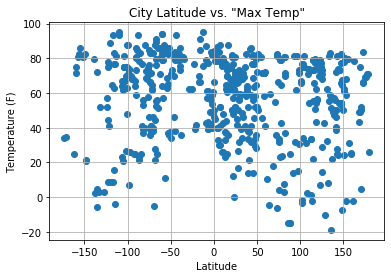

In [92]:
plt.scatter(city_data_df['Latitude'], city_data_df['Max Temp'])
plt.title(f'City Latitude vs. "Max Temp"')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.savefig('lat_temp.png', bbox_inches='tight')

#### Latitude vs. Humidity Plot

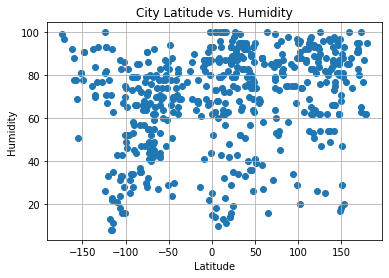

In [93]:
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'])
plt.title(f'City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)
plt.savefig('lat_temp.png', bbox_inches='tight')

#### Latitude vs. Cloudiness Plot

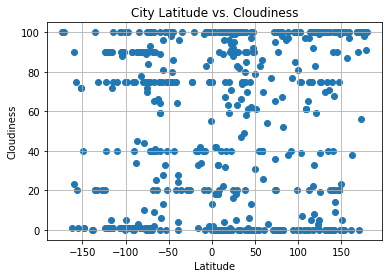

In [94]:
plt.scatter(city_data_df['Latitude'], city_data_df['Cloudiness'])
plt.title(f'City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)
plt.savefig('lat_temp.png', bbox_inches='tight')

#### Latitude vs. Wind Speed Plot

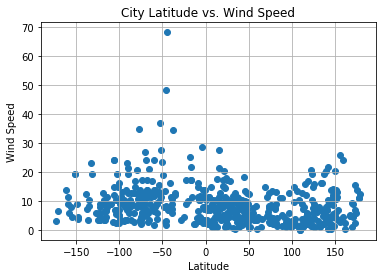

In [95]:
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed'])
plt.title(f'City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.savefig('lat_temp.png', bbox_inches='tight')